It appears that my initial baseline model is underfit and needs more complexity. So I decided to add some more dummy variables from sub_genre feature

## Contents:
1. Create dummy variables for SUB_GENRE column
2. Repeat the baseline model Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Accessing cleaned df
df = pd.read_pickle('./data/cleaned_df.pickle')
df.sample(5)

,TITLE,YEAR,EBERT_RATING,MPAA,RUNTIME,GENRE,SUB_GENRE,MOVIELENS_RATING,IMDB_RATING,BUDGET,OPENING_GROSS,DOMESTIC_GROSS,WORLDWIDE_GROSS
212,Buried,2010,3.5,R,95,Thriller,Mystery,3.345261,7.0,3000000,100268,1044143,19439764
622,The Great Raid,2005,3.0,R,132,War,History,3.478593,6.7,80000000,3376009,10167373,10777375
1198,Drive Me Crazy,1999,2.5,PG-13,94,Romance,Family,2.753683,5.8,8500000,6846112,17845337,22593409
152,Thor,2011,1.5,PG-13,115,Thriller,Science Fiction,3.506395,7.0,150000000,65723338,181030624,449326618
1139,Chicken Run,2000,3.5,G,85,Foreign,Family,3.581350,7.0,45000000,17506162,106834564,224834564


## 1. Create dummy variables for SUB_GENRE column

In [3]:
df.SUB_GENRE.value_counts().sort_values(ascending=False)

Drama              502
Comedy             332
N                  179
Science Fiction    139
Romance            119
Fantasy            114
Family              86
Foreign             85
Indie               80
Crime               79
Mystery             79
Suspense            71
Action              69
Horror              68
Adventure           60
Music               30
History             29
Animation           19
Thriller            13
Musical              9
Documentary          8
Erotic               5
Holiday              4
Disaster             4
Sports Film          3
Sport                2
Road Movie           1
Film Noir            1
Neo-noir             1
Name: SUB_GENRE, dtype: int64

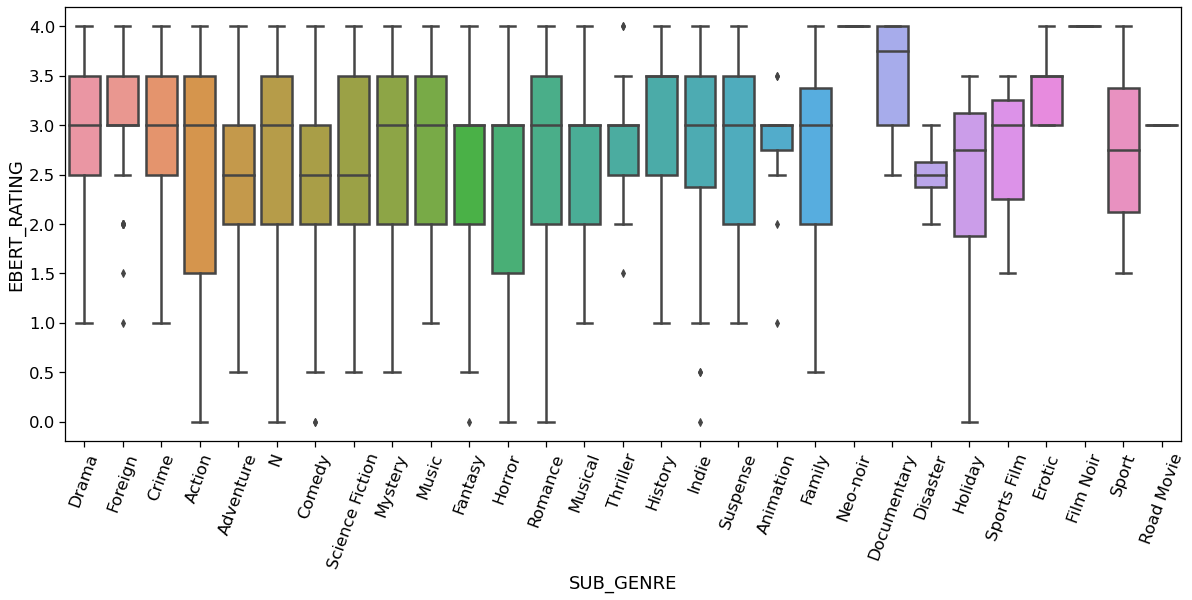

In [4]:
plt.figure(figsize=(20,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(x="SUB_GENRE", y="EBERT_RATING", data=df)
plt.xticks(rotation=70);

In [5]:
subgenre_dict = {'Drama': 'Drama',
                 'Comedy': 'Comedy',
                 'N': 'Other',
                 'Science Fiction': 'Science Fiction',
                 'Romance': 'Romance',
                 'Fantasy':'Fantasy',
                 'Family': 'Family',
                 'Foreign': 'Foreign',
                 'Indie': 'Indie',
                 'Mystery': 'Mystery',
                 'Crime': 'Crime',
                 'Suspense': 'Suspense',
                 'Action': 'Action',
                 'Horror': 'Horror',
                 'Adventure': 'Adventure',
                 'Music': 'Music',
                 'History': 'History',
                 'Animation':'Animation',
                 'Thriller': 'Thriller',
                 'Musical': 'Musical',
                 'Documentary': 'Documentary',
                 'Erotic': 'Other',
                 'Disaster': 'Other',
                 'Holiday': 'Other',
                 'Sports Film': 'Other',
                 'Sport': 'Other',
                 'Film Noir': 'Other',
                 'Road Movie': 'Other',
                 'Neo-noir': 'Other'
}
df['SUB_GENRE'] = df.SUB_GENRE.map(subgenre_dict)

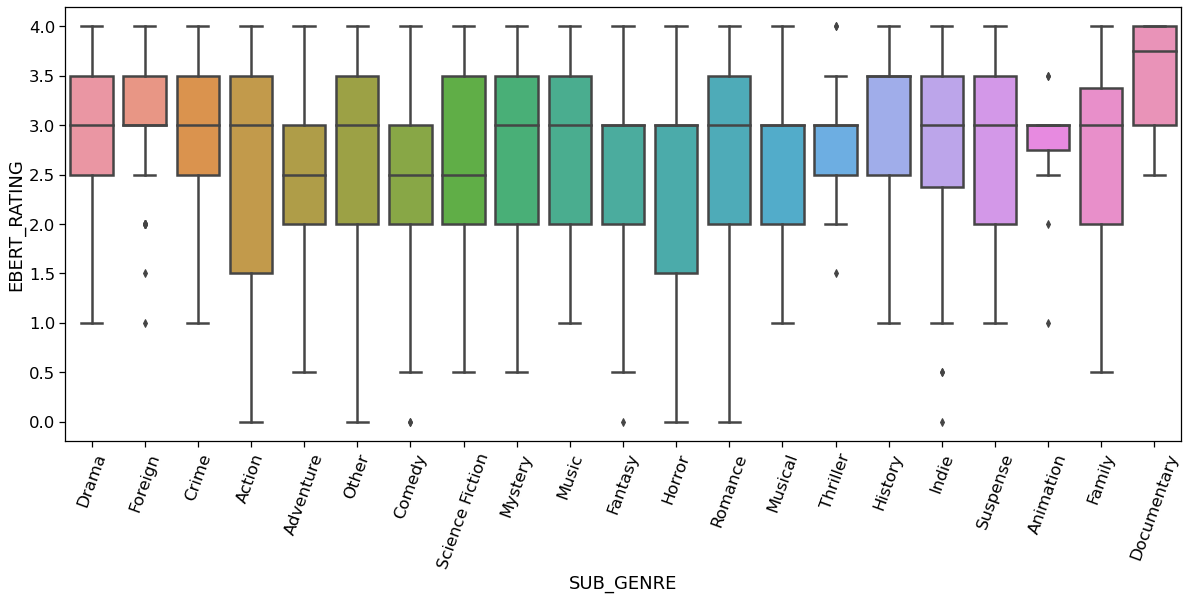

In [6]:
plt.figure(figsize=(20,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(x="SUB_GENRE", y="EBERT_RATING", data=df)
plt.xticks(rotation=70);

## 2. Repeat the baseline model Feature Engineering

In [7]:
# Proportion of opening week gross
df['OPEN_PROPORTION'] = df.OPENING_GROSS / df.WORLDWIDE_GROSS

# Proportion of domestic gross
df['DOMESTIC_PROPORTION'] = df.DOMESTIC_GROSS / df.WORLDWIDE_GROSS

Created dummy variables for categorical features - `Genre` and `mpaa rating`

In [8]:
# dict for mapping
genre_dict= {'Thriller': 'Thriller',
             'Romance': 'Romance',
             'Science Fiction': 'Science Fiction',
             'Drama':'Drama',
             'Family': 'Family',
             'Comedy': 'Comedy',
             'Indie': 'Indie',
             'History': 'History-Documentary-War',
             'Sports Film': 'Sport',
             'Music': 'Musical',
             'Horror': 'Crime-Horror',
             'Foreign': 'Foreign',
             'War': 'History-Documentary-War',
             'Western':'Western',
             'Musical':'Musical',
             'Crime':'Crime-Horror',
             'Fantasy':'Fantasy-Mystery',
             'Documentary':'History-Documentary-War',
             'Mystery':'Fantasy-Mystery',
             'Sport':'Sport',
             'Adventure':'Adventure-Animation',
             'Holiday': 'Other',
             'Animation':'Adventure-Animation',
             'Road Movie': 'Other',
             'Action': 'Western',
             'Erotic': 'Other',
             'Suspense': 'Other',
             'Film Noir': 'Other' }

df['GENRE'] = df.GENRE.map(genre_dict)

In [9]:
genre_dummies = pd.get_dummies(df['GENRE'], prefix='GENRE', drop_first=True)
subgenre_dummies = pd.get_dummies(df['SUB_GENRE'], prefix='SUB_GENRE', drop_first=True)
mpaa_dummies = pd.get_dummies(df['MPAA'], prefix='MPAA', drop_first=True)

df = df.join(genre_dummies).join(mpaa_dummies).join(subgenre_dummies)
df.drop(['TITLE', 'GENRE', 'SUB_GENRE', 'MPAA'], inplace=True, axis=1)
df.head()

,YEAR,EBERT_RATING,RUNTIME,MOVIELENS_RATING,IMDB_RATING,BUDGET,OPENING_GROSS,DOMESTIC_GROSS,WORLDWIDE_GROSS,OPEN_PROPORTION,...,SUB_GENRE_Horror,SUB_GENRE_Indie,SUB_GENRE_Music,SUB_GENRE_Musical,SUB_GENRE_Mystery,SUB_GENRE_Other,SUB_GENRE_Romance,SUB_GENRE_Science Fiction,SUB_GENRE_Suspense,SUB_GENRE_Thriller
0,2013,3.5,106,3.642730,7.1,30000000,9303145,32172757,63414135,0.146705,...,0,0,0,0,0,0,0,0,0,0
1,2012,2.5,98,3.451807,6.8,11000000,47122,18390117,59520298,0.000792,...,0,0,0,0,0,0,0,0,0,0
2,2012,2.0,106,2.939024,5.7,35000000,5750288,13103272,30962335,0.185719,...,0,0,0,0,0,0,0,0,0,0
3,1982,4.0,105,3.825658,7.8,2600000,11623,8144,8144,1.427186,...,0,0,0,0,0,0,0,0,0,0
4,2012,2.0,104,3.225352,6.2,15000000,6812900,15026056,37930465,0.179616,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['YEAR', 'EBERT_RATING', 'RUNTIME', 'MOVIELENS_RATING', 'IMDB_RATING',
       'BUDGET', 'OPENING_GROSS', 'DOMESTIC_GROSS', 'WORLDWIDE_GROSS',
       'OPEN_PROPORTION', 'DOMESTIC_PROPORTION', 'GENRE_Comedy',
       'GENRE_Crime-Horror', 'GENRE_Drama', 'GENRE_Family',
       'GENRE_Fantasy-Mystery', 'GENRE_Foreign',
       'GENRE_History-Documentary-War', 'GENRE_Indie', 'GENRE_Musical',
       'GENRE_Other', 'GENRE_Romance', 'GENRE_Science Fiction', 'GENRE_Sport',
       'GENRE_Thriller', 'GENRE_Western', 'MPAA_NC-17', 'MPAA_NR', 'MPAA_PG',
       'MPAA_PG-13', 'MPAA_R', 'SUB_GENRE_Adventure', 'SUB_GENRE_Animation',
       'SUB_GENRE_Comedy', 'SUB_GENRE_Crime', 'SUB_GENRE_Documentary',
       'SUB_GENRE_Drama', 'SUB_GENRE_Family', 'SUB_GENRE_Fantasy',
       'SUB_GENRE_Foreign', 'SUB_GENRE_History', 'SUB_GENRE_Horror',
       'SUB_GENRE_Indie', 'SUB_GENRE_Music', 'SUB_GENRE_Musical',
       'SUB_GENRE_Mystery', 'SUB_GENRE_Other', 'SUB_GENRE_Romance',
       'SUB_GENRE_Science Ficti

In [11]:
# Dropping features with high collinearity
df.drop(['BUDGET', 'OPENING_GROSS', 'DOMESTIC_GROSS', 'WORLDWIDE_GROSS','DOMESTIC_PROPORTION'], inplace=True, axis=1)

In [12]:
# Checking the top 15 + correlation 
df.corr()['EBERT_RATING'].sort_values(ascending=False)[:15]

EBERT_RATING                     1.000000
MOVIELENS_RATING                 0.592743
IMDB_RATING                      0.574228
RUNTIME                          0.244737
SUB_GENRE_Drama                  0.140985
GENRE_History-Documentary-War    0.110710
SUB_GENRE_Foreign                0.098942
GENRE_Indie                      0.096664
MPAA_R                           0.089282
GENRE_Drama                      0.078999
MPAA_NR                          0.078925
SUB_GENRE_Documentary            0.052799
SUB_GENRE_Crime                  0.046702
GENRE_Foreign                    0.045867
SUB_GENRE_History                0.044482
Name: EBERT_RATING, dtype: float64

In [13]:
# top 15 - correlation
df.corr()['EBERT_RATING'].sort_values()[:15]

OPEN_PROPORTION             -0.357860
GENRE_Comedy                -0.147666
SUB_GENRE_Comedy            -0.123669
MPAA_PG-13                  -0.110950
SUB_GENRE_Horror            -0.076378
GENRE_Science Fiction       -0.069142
SUB_GENRE_Adventure         -0.064252
GENRE_Crime-Horror          -0.060948
YEAR                        -0.059881
MPAA_PG                     -0.048543
SUB_GENRE_Science Fiction   -0.038045
SUB_GENRE_Family            -0.031308
SUB_GENRE_Other             -0.025053
GENRE_Family                -0.021422
SUB_GENRE_Fantasy           -0.020241
Name: EBERT_RATING, dtype: float64

In [14]:
# Checking for out of proportion value
df[df.OPEN_PROPORTION > 1]

,YEAR,EBERT_RATING,RUNTIME,MOVIELENS_RATING,IMDB_RATING,OPEN_PROPORTION,GENRE_Comedy,GENRE_Crime-Horror,GENRE_Drama,GENRE_Family,...,SUB_GENRE_Horror,SUB_GENRE_Indie,SUB_GENRE_Music,SUB_GENRE_Musical,SUB_GENRE_Mystery,SUB_GENRE_Other,SUB_GENRE_Romance,SUB_GENRE_Science Fiction,SUB_GENRE_Suspense,SUB_GENRE_Thriller
3,1982,4.0,105,3.825658,7.8,1.427186,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2164,1981,3.0,120,3.250000,7.2,1.427186,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Drop those 2 rows
df2 = df[df.OPEN_PROPORTION <= 1]

In [16]:
print(df.shape)
print(df2.shape)

(2191, 46)
(2189, 46)


In [17]:
# save as pickle
df2.to_pickle('./data/final_df2.pickle')